In [27]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# TensorFlow/Keras Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array  # Correct imports for image processing
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import (
    EfficientNetB3,
    ResNet50,
    DenseNet121,
    MobileNetV2,
    VGG16
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Scikit-learn Libraries for Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
print("GPU Available:", tf.test.is_gpu_available())

GPU Available: True


<div style="
    background: linear-gradient(to right, #f7f8fa, #e6f2ff); 
    color: #333; 
    border-radius: 15px; 
    text-align: center; 
    font-size: 20px; 
    padding: 25px; 
    border: 2px solid #ff4d4d; 
    width: 95%; 
    margin: 30px auto; 
    box-shadow: 0 6px 12px rgba(0, 0, 0, 0.2), 0 0 15px rgba(255, 77, 77, 0.5); 
    transition: all 0.3s ease-in-out;">
    <h1 style="font-size: 28px; margin: 0; font-family: 'Arial', sans-serif;">
        <span style="
            color: #ff3333; 
            font-weight: bold; 
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2);">
            ResNet50
        </span>
    </h1>
</div>

<style>
    div:hover {
        transform: scale(1.03); /* Slight zoom on hover */
        box-shadow: 0 8px 16px rgba(0, 0, 0, 0.3), 0 0 20px rgba(255, 77, 77, 0.7);
    }
</style>

In [3]:
# Dataset paths
train_dir = "/kaggle/input/animal/Dataset/train"
val_dir = "/kaggle/input/animal/Dataset/val"
test_dir = "/kaggle/input/animal/Dataset/test"

# Image dimensions and batch size
IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 32

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
)

val_test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Load training, validation, and test data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="sparse",
)

val_data = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="sparse",
)

test_data = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="sparse",
)

# Load ResNet50 pre-trained model
base_model = ResNet50(
    input_tensor=Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),  # Correct input shape
    include_top=False,  # Exclude top layers
    weights="imagenet",  # Use pre-trained weights
)

# Freeze the base model
base_model.trainable = False

# Add custom layers on top of ResNet50
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Convert feature maps to single vector
x = Dense(128, activation="relu")(x)  # Fully connected layer
x = Dropout(0.3)(x)  # Dropout for regularization
outputs = Dense(3, activation="softmax")(x)  # Final output layer for 3 classes

# Define the final model
model = Model(inputs=base_model.input, outputs=outputs)

# Compile the model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",  # Use sparse loss for integer labels
    metrics=["accuracy"],
)

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Found 1027 images belonging to 3 classes.
Found 378 images belonging to 3 classes.
Found 358 images belonging to 3 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.3279 - loss: 1.2633 - val_accuracy: 0.7143 - val_loss: 0.9368
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 26s 656ms/step - accuracy: 0.4059 - loss: 1.1196 - val_accuracy: 0.7143 - val_loss: 0.9506
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 26s 678ms/step - accuracy: 0.3658 - loss: 1.0971 - val_accuracy: 0.7143 - val_loss: 0.9372
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 27s 674ms/step - accuracy: 0.4115 - loss: 1.0865 - val_accuracy: 0.7143 - val_loss: 0.9657
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 26s 662ms/step - accuracy: 0.3899 - loss: 1.0919 - val_accuracy: 0.7143 - val_loss: 0.9735
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 26s 657ms/step - accuracy: 0.4063 - loss: 1.0837 - val_accuracy: 0.7143 - val_loss: 0.9803
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 26s 647ms/step -

12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 398ms/step - accuracy: 0.9848 - loss: 0.0426
Test Accuracy: 98.32%
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 405ms/step


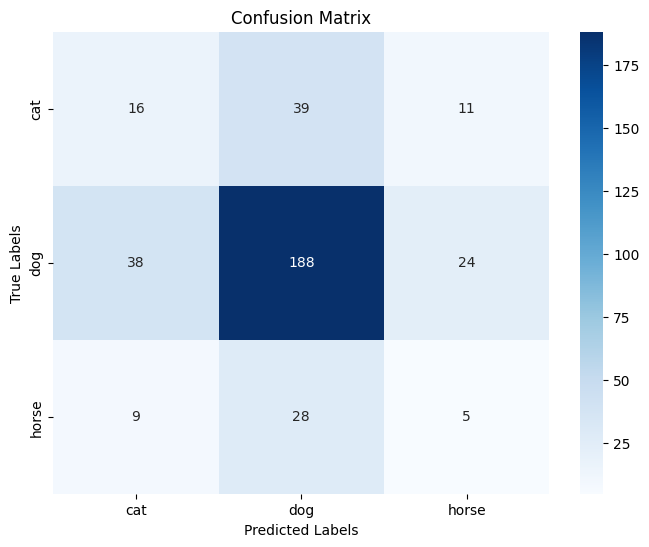

Classification Report:

              precision    recall  f1-score   support

         cat       0.25      0.24      0.25        66
         dog       0.74      0.75      0.74       250
       horse       0.12      0.12      0.12        42

    accuracy                           0.58       358
   macro avg       0.37      0.37      0.37       358
weighted avg       0.58      0.58      0.58       358

              precision    recall  f1-score     support
cat            0.253968  0.242424  0.248062   66.000000
dog            0.737255  0.752000  0.744554  250.000000
horse          0.125000  0.119048  0.121951   42.000000
accuracy       0.583799  0.583799  0.583799    0.583799
macro avg      0.372074  0.371157  0.371523  358.000000
weighted avg   0.576329  0.583799  0.579979  358.000000


In [23]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Get true labels and predictions
test_data.reset()  # Reset the test data generator to start from the beginning
true_labels = test_data.classes  # Ground truth labels
predictions = model.predict(test_data)  # Model predictions
predicted_labels = np.argmax(predictions, axis=1)  # Convert probabilities to class indices

# Generate a confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=list(class_labels.values()), yticklabels=list(class_labels.values()))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Generate a classification report
report = classification_report(true_labels, predicted_labels, target_names=list(class_labels.values()))
print("Classification Report:\n")
print(report)

# Save classification report as a DataFrame
report_df = pd.DataFrame(
    classification_report(true_labels, predicted_labels, target_names=list(class_labels.values()), output_dict=True)
).transpose()

# Display the report as a table
print(report_df)

In [4]:
# Save the model
model.save("animal_classification_resnet50_fixed.h5")
print("Model saved as 'animal_classification_resnet50_fixed.h5'")

# Load the model
loaded_model = tf.keras.models.load_model("animal_classification_resnet50_fixed.h5")
print("Model loaded successfully!")
#loaded_model.summary()

Model saved as 'animal_classification_resnet50_fixed.h5'
Model loaded successfully!


In [5]:
# Function to predict an image
def predict_image(model, img_path, target_size):
    """
    Predict the class of an image using a trained model.
    """
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize pixel values

    # Perform prediction
    predictions = model.predict(img_array)
    class_index = np.argmax(predictions, axis=1)[0]
    confidence = np.max(predictions)

    # Display the image
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted Class: {class_index}, Confidence: {confidence:.2f}")
    plt.show()

    return class_index, confidence

Selected image: /kaggle/input/animal/Dataset/test/horse/pexels-photo-629139.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


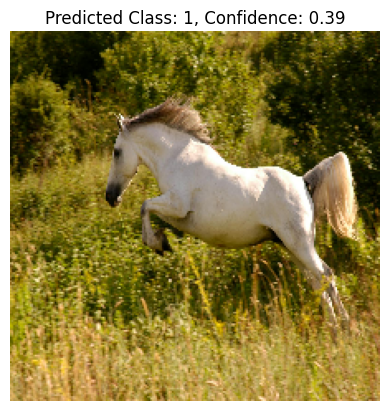

Predicted Class: dog
Confidence: 38.93%


In [6]:
# Get class labels
class_labels = train_data.class_indices
class_labels = {v: k for k, v in class_labels.items()}  # Reverse the dictionary

# Select a specific image file from the directory
img_directory = "/kaggle/input/animal/Dataset/test/horse"  # Directory containing horse images
img_file = os.listdir(img_directory)[0]  # Take the first image file
img_path = os.path.join(img_directory, img_file)  # Full path to the image file

print(f"Selected image: {img_path}")

# Predict on the selected image
predicted_class, confidence = predict_image(loaded_model, img_path, (IMG_HEIGHT, IMG_WIDTH))

# Display the prediction
print(f"Predicted Class: {class_labels[predicted_class]}")
print(f"Confidence: {confidence * 100:.2f}%")

<div style="
    background: linear-gradient(to right, #f7f8fa, #e6f2ff); 
    color: #333; 
    border-radius: 15px; 
    text-align: center; 
    font-size: 20px; 
    padding: 25px; 
    border: 2px solid #ff4d4d; 
    width: 95%; 
    margin: 30px auto; 
    box-shadow: 0 6px 12px rgba(0, 0, 0, 0.2), 0 0 15px rgba(255, 77, 77, 0.5); 
    transition: all 0.3s ease-in-out;">
    <h1 style="font-size: 28px; margin: 0; font-family: 'Arial', sans-serif;">
        <span style="
            color: #ff3333; 
            font-weight: bold; 
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2);">
            ResNet50
        </span>
    </h1>
</div>

<style>
    div:hover {
        transform: scale(1.03); /* Slight zoom on hover */
        box-shadow: 0 8px 16px rgba(0, 0, 0, 0.3), 0 0 20px rgba(255, 77, 77, 0.7);
    }
</style>

Found 1027 images belonging to 3 classes.
Found 378 images belonging to 3 classes.
Found 358 images belonging to 3 classes.
Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 42s 866ms/step - accuracy: 0.3253 - loss: 1.5511 - val_accuracy: 0.7143 - val_loss: 0.8919 - learning_rate: 0.0010
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 28s 704ms/step - accuracy: 0.3772 - loss: 1.3181 - val_accuracy: 0.2143 - val_loss: 1.0670 - learning_rate: 0.0010
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 28s 716ms/step - accuracy: 0.3501 - loss: 1.2538 - val_accuracy: 0.7011 - val_loss: 1.0404 - learning_rate: 0.0010
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 537ms/step - accuracy: 0.3342 - loss: 1.2480
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
33/33 ━━━━━━━━━━━━━━━━━━━━ 28s 701ms/step - accuracy: 0.3344 - loss: 1.2480 - val_accuracy: 0.5556 - val_loss: 1.0351 - learning_rate: 0.0010
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 28s 705ms/step - accuracy: 0.3807 - loss: 1.2537 - val_accuracy: 0.6349 - v

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,850,373 (90.98 MB)

 Trainable params: 4,728,323 (18.04 MB)

 Non-trainable params: 19,122,048 (72.94 MB)

 Optimizer params: 2 (12.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


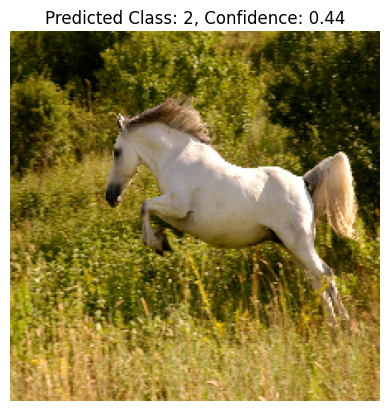

Predicted Class: horse
Confidence: 43.57%


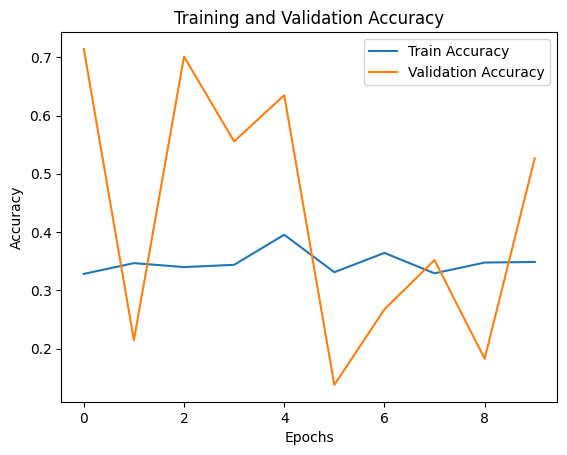

In [7]:
# Dataset paths
train_dir = "/kaggle/input/animal/Dataset/train"
val_dir = "/kaggle/input/animal/Dataset/val"
test_dir = "/kaggle/input/animal/Dataset/test"

# Image dimensions and batch size
IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 32

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
)

val_test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Load training, validation, and test data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="sparse",
)

val_data = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="sparse",
)

test_data = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="sparse",
)

# Load ResNet50 pre-trained model
base_model = ResNet50(
    input_tensor=Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),  # Correct input shape
    include_top=False,  # Exclude top layers
    weights="imagenet",  # Use pre-trained weights
)

# Freeze the base model
base_model.trainable = False

# Add custom layers on top of ResNet50
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Convert feature maps to single vector
x = Dense(128, activation="relu")(x)  # Fully connected layer
x = Dropout(0.3)(x)  # Dropout for regularization
outputs = Dense(3, activation="softmax")(x)  # Final output layer for 3 classes

# Define the final model
model = Model(inputs=base_model.input, outputs=outputs)

# Compile the model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",  # Use sparse loss for integer labels
    metrics=["accuracy"],
)

# Train the model with class weights to handle imbalance
class_weights = {0: 1.0, 1: 1.0, 2: 1.5}  # Increase weight for under-represented class

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor="val_loss", patience=3, factor=0.5, verbose=1)

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    class_weight=class_weights,
    callbacks=[lr_scheduler],
)

# Fine-tune the model by unfreezing some layers
base_model.trainable = True
for layer in base_model.layers[:-10]:  # Freeze all but the last 10 layers
    layer.trainable = False

# Recompile the model for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

# Fine-tune the model
history_finetune = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5,  # Fine-tuning for fewer epochs
    class_weight=class_weights,
    callbacks=[lr_scheduler],
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Save the model
model.save("animal_classification_resnet50_final.h5")
print("Model saved as 'animal_classification_resnet50_final.h5'")

# Load the model
loaded_model = tf.keras.models.load_model("animal_classification_resnet50_final.h5")
print("Model loaded successfully!")
loaded_model.summary()

# Function to predict an image
def predict_image(model, img_path, target_size):
    """
    Predict the class of an image using a trained model.
    """
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize pixel values

    # Perform prediction
    predictions = model.predict(img_array)
    class_index = np.argmax(predictions, axis=1)[0]
    confidence = np.max(predictions)

    # Display the image
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted Class: {class_index}, Confidence: {confidence:.2f}")
    plt.show()

    return class_index, confidence


# Get class labels
class_labels = train_data.class_indices
class_labels = {v: k for k, v in class_labels.items()}  # Reverse the dictionary

# Predict on a new image
img_directory = "/kaggle/input/animal/Dataset/test/horse"  # Replace with your image path
img_file = os.listdir(img_directory)[0]  # Take the first image file
img_path = os.path.join(img_directory, img_file)  # Full path to the image file

predicted_class, confidence = predict_image(loaded_model, img_path, (IMG_HEIGHT, IMG_WIDTH))

# Display the prediction
print(f"Predicted Class: {class_labels[predicted_class]}")
print(f"Confidence: {confidence * 100:.2f}%")

# Plot training and validation accuracy
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


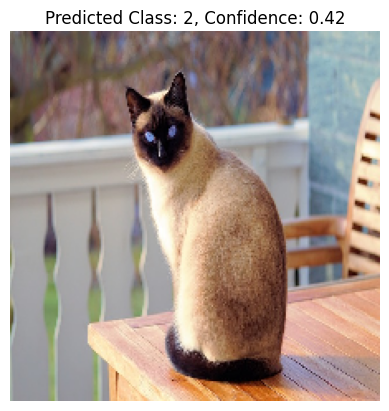

Predicted Class: horse
Confidence: 42.25%


In [8]:
# Get class labels
class_labels = train_data.class_indices
class_labels = {v: k for k, v in class_labels.items()}  # Reverse the dictionary

# Specify the image file directly (path to the image file)
img_path = "/kaggle/input/animal/Dataset/test/cat/cat-2068462_640.jpg"

# Predict on the selected image
predicted_class, confidence = predict_image(loaded_model, img_path, (IMG_HEIGHT, IMG_WIDTH))

# Display the prediction
print(f"Predicted Class: {class_labels[predicted_class]}")
print(f"Confidence: {confidence * 100:.2f}%")

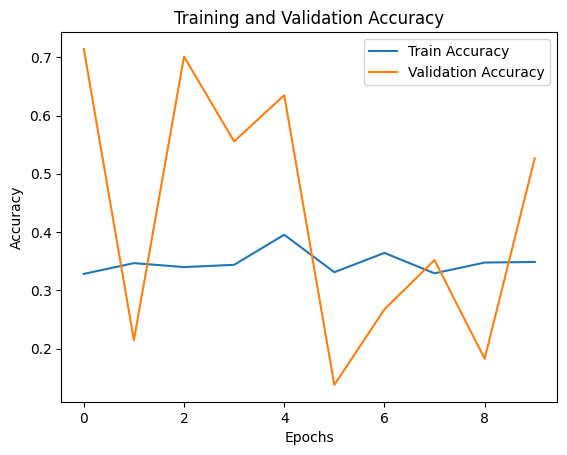

In [9]:
# Plot training and validation accuracy
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 413ms/step - accuracy: 0.9825 - loss: 0.0495
Test Accuracy: 98.32%
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 434ms/step


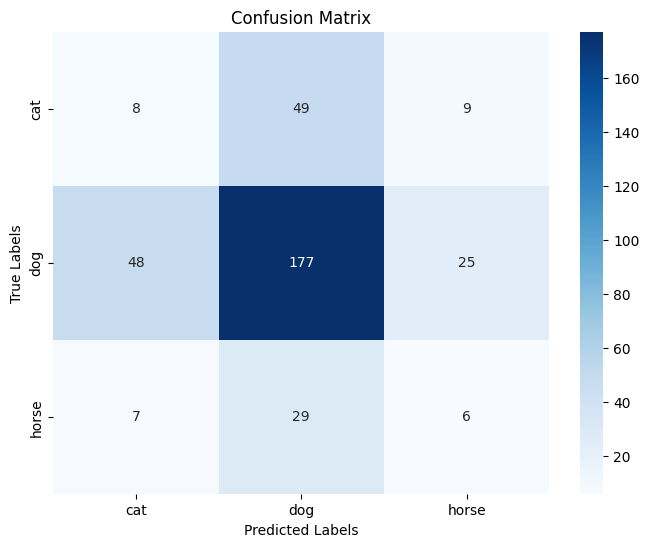

Classification Report:

              precision    recall  f1-score   support

         cat       0.13      0.12      0.12        66
         dog       0.69      0.71      0.70       250
       horse       0.15      0.14      0.15        42

    accuracy                           0.53       358
   macro avg       0.32      0.32      0.32       358
weighted avg       0.53      0.53      0.53       358

              precision    recall  f1-score    support
cat            0.126984  0.121212  0.124031   66.00000
dog            0.694118  0.708000  0.700990  250.00000
horse          0.150000  0.142857  0.146341   42.00000
accuracy       0.533520  0.533520  0.533520    0.53352
macro avg      0.323701  0.324023  0.323788  358.00000
weighted avg   0.525727  0.533520  0.529553  358.00000


In [22]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Get true labels and predictions
test_data.reset()  # Reset the test data generator to start from the beginning
true_labels = test_data.classes  # Ground truth labels
predictions = model.predict(test_data)  # Model predictions
predicted_labels = np.argmax(predictions, axis=1)  # Convert probabilities to class indices

# Generate a confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=list(class_labels.values()), yticklabels=list(class_labels.values()))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Generate a classification report
report = classification_report(true_labels, predicted_labels, target_names=list(class_labels.values()))
print("Classification Report:\n")
print(report)

# Save classification report as a DataFrame
report_df = pd.DataFrame(
    classification_report(true_labels, predicted_labels, target_names=list(class_labels.values()), output_dict=True)
).transpose()

# Display the report as a table
print(report_df)

<div style="
    background: linear-gradient(to right, #f7f8fa, #e6f2ff); 
    color: #333; 
    border-radius: 15px; 
    text-align: center; 
    font-size: 20px; 
    padding: 25px; 
    border: 2px solid #ff4d4d; 
    width: 95%; 
    margin: 30px auto; 
    box-shadow: 0 6px 12px rgba(0, 0, 0, 0.2), 0 0 15px rgba(255, 77, 77, 0.5); 
    transition: all 0.3s ease-in-out;">
    <h1 style="font-size: 28px; margin: 0; font-family: 'Arial', sans-serif;">
        <span style="
            color: #ff3333; 
            font-weight: bold; 
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2);">
            MobileNetV2
        </span>
    </h1>
</div>

<style>
    div:hover {
        transform: scale(1.03); /* Slight zoom on hover */
        box-shadow: 0 8px 16px rgba(0, 0, 0, 0.3), 0 0 20px rgba(255, 77, 77, 0.7);
    }
</style>

In [11]:
# Dataset paths
train_dir = "/kaggle/input/animal/Dataset/train"
val_dir = "/kaggle/input/animal/Dataset/val"
test_dir = "/kaggle/input/animal/Dataset/test"

# Image dimensions and batch size
IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 32

In [12]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
)

val_test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Load training, validation, and test data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="sparse",
)

val_data = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="sparse",
)

test_data = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="sparse",
)

Found 1027 images belonging to 3 classes.
Found 378 images belonging to 3 classes.
Found 358 images belonging to 3 classes.


In [13]:
# Load MobileNetV2 pre-trained model
base_model = MobileNetV2(
    input_tensor=Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),  # Correct input shape
    include_top=False,  # Exclude top layers
    weights="imagenet",  # Use pre-trained weights
)

# Freeze the base model
base_model.trainable = False

# Add custom layers on top of MobileNetV2
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Convert feature maps to single vector
x = Dense(128, activation="relu")(x)  # Fully connected layer
x = Dropout(0.3)(x)  # Dropout for regularization
outputs = Dense(3, activation="softmax")(x)  # Final output layer for 3 classes

# Define the final model
model = Model(inputs=base_model.input, outputs=outputs)

# Compile the model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",  # Use sparse loss for integer labels
    metrics=["accuracy"],
)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [14]:
# Train the model with class weights to handle imbalance
class_weights = {0: 1.0, 1: 1.0, 2: 1.5}  # Increase weight for under-represented class

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor="val_loss", patience=3, factor=0.5, verbose=1)

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    class_weight=class_weights,
    callbacks=[lr_scheduler],
)

# Fine-tune the model by unfreezing some layers
base_model.trainable = True
for layer in base_model.layers[:-20]:  # Freeze all but the last 20 layers
    layer.trainable = False

# Recompile the model for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 44s 941ms/step - accuracy: 0.6604 - loss: 0.8824 - val_accuracy: 0.9365 - val_loss: 0.2148 - learning_rate: 0.0010
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 27s 683ms/step - accuracy: 0.9125 - loss: 0.3066 - val_accuracy: 0.9550 - val_loss: 0.1695 - learning_rate: 0.0010
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 28s 687ms/step - accuracy: 0.9200 - loss: 0.2658 - val_accuracy: 0.9550 - val_loss: 0.1664 - learning_rate: 0.0010
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 27s 676ms/step - accuracy: 0.9443 - loss: 0.2220 - val_accuracy: 0.9577 - val_loss: 0.1725 - learning_rate: 0.0010
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 28s 692ms/step - accuracy: 0.9406 - loss: 0.1787 - val_accuracy: 0.9630 - val_loss: 0.1304 - learning_rate: 0.0010
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 27s 668ms/step - accuracy: 0.9383 - loss: 0.1820 - val_accuracy: 0.9630 - val_loss: 0.1178 - learning_rate: 0.0010
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 28s 701ms/step - accuracy: 0.9540 - loss: 0.

In [15]:
# Fine-tune the model
history_finetune = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5,  # Fine-tuning for fewer epochs
    class_weight=class_weights,
    callbacks=[lr_scheduler],
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 48s 937ms/step - accuracy: 0.9212 - loss: 0.2791 - val_accuracy: 0.9762 - val_loss: 0.0910 - learning_rate: 1.0000e-04
Epoch 2/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 27s 678ms/step - accuracy: 0.9556 - loss: 0.1486 - val_accuracy: 0.9709 - val_loss: 0.0621 - learning_rate: 1.0000e-04
Epoch 3/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 28s 702ms/step - accuracy: 0.9548 - loss: 0.1261 - val_accuracy: 0.9815 - val_loss: 0.0549 - learning_rate: 1.0000e-04
Epoch 4/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 27s 693ms/step - accuracy: 0.9656 - loss: 0.1216 - val_accuracy: 0.9762 - val_loss: 0.0498 - learning_rate: 1.0000e-04
Epoch 5/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 27s 671ms/step - accuracy: 0.9789 - loss: 0.0813 - val_accuracy: 0.9841 - val_loss: 0.0479 - learning_rate: 1.0000e-04
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 592ms/step - accuracy: 0.9644 - loss: 0.0956
Test Accuracy: 98.32%


In [16]:

# Save the model
model.save("animal_classification_mobilenetv2.h5")
print("Model saved as 'animal_classification_mobilenetv2.h5'")

# Load the model
loaded_model = tf.keras.models.load_model("animal_classification_mobilenetv2.h5")
print("Model loaded successfully!")
loaded_model.summary()

Model saved as 'animal_classification_mobilenetv2.h5'
Model loaded successfully!


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,422,341 (9.24 MB)

 Trainable params: 1,370,435 (5.23 MB)

 Non-trainable params: 1,051,904 (4.01 MB)

 Optimizer params: 2 (12.00 B)

<div style="
    background: linear-gradient(to right, #f7f8fa, #e6f2ff); 
    color: #333; 
    border-radius: 15px; 
    text-align: center; 
    font-size: 20px; 
    padding: 25px; 
    border: 2px solid #ff4d4d; 
    width: 95%; 
    margin: 30px auto; 
    box-shadow: 0 6px 12px rgba(0, 0, 0, 0.2), 0 0 15px rgba(255, 77, 77, 0.5); 
    transition: all 0.3s ease-in-out;">
    <h1 style="font-size: 28px; margin: 0; font-family: 'Arial', sans-serif;">
        <span style="
            color: #ff3333; 
            font-weight: bold; 
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2);">
            Build Prediction Pipeline.
        </span>
    </h1>
</div>

<style>
    div:hover {
        transform: scale(1.03); /* Slight zoom on hover */
        box-shadow: 0 8px 16px rgba(0, 0, 0, 0.3), 0 0 20px rgba(255, 77, 77, 0.7);
    }
</style>

In [17]:
# Function to predict an image
def predict_image(model, img_path, target_size):
    """
    Predict the class of an image using a trained model.
    """
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize pixel values

    # Perform prediction
    predictions = model.predict(img_array)
    class_index = np.argmax(predictions, axis=1)[0]
    confidence = np.max(predictions)

    # Display the image
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted Class: {class_index}, Confidence: {confidence:.2f}")
    plt.show()

    return class_index, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


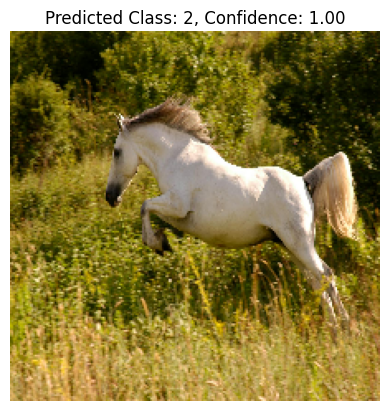

Predicted Class: horse
Confidence: 100.00%


In [18]:
# Get class labels
class_labels = train_data.class_indices
class_labels = {v: k for k, v in class_labels.items()}  # Reverse the dictionary

# Predict on a new image
img_directory = "/kaggle/input/animal/Dataset/test/horse"  # Replace with your image path
img_file = os.listdir(img_directory)[0]  # Take the first image file
img_path = os.path.join(img_directory, img_file)  # Full path to the image file

predicted_class, confidence = predict_image(loaded_model, img_path, (IMG_HEIGHT, IMG_WIDTH))

# Display the prediction
print(f"Predicted Class: {class_labels[predicted_class]}")
print(f"Confidence: {confidence * 100:.2f}%")

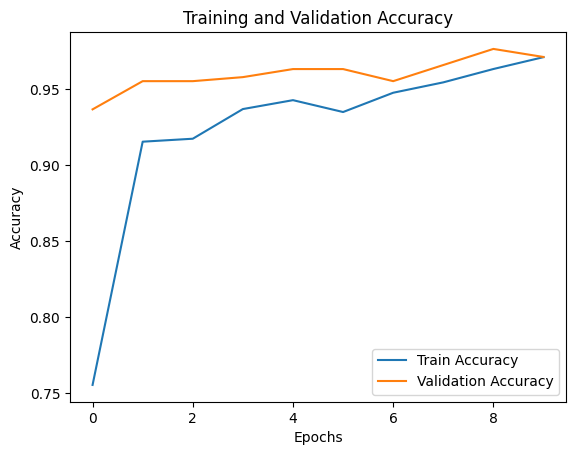

In [19]:
# Plot training and validation accuracy
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 405ms/step - accuracy: 0.9840 - loss: 0.0487
Test Accuracy: 98.32%
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 590ms/step


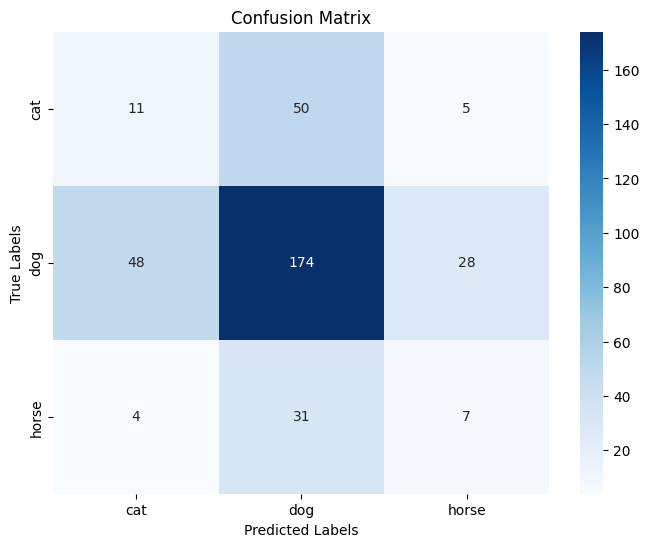

Classification Report:

              precision    recall  f1-score   support

         cat       0.17      0.17      0.17        66
         dog       0.68      0.70      0.69       250
       horse       0.17      0.17      0.17        42

    accuracy                           0.54       358
   macro avg       0.34      0.34      0.34       358
weighted avg       0.53      0.54      0.53       358

              precision    recall  f1-score     support
cat            0.174603  0.166667  0.170543   66.000000
dog            0.682353  0.696000  0.689109  250.000000
horse          0.175000  0.166667  0.170732   42.000000
accuracy       0.536313  0.536313  0.536313    0.536313
macro avg      0.343985  0.343111  0.343461  358.000000
weighted avg   0.529224  0.536313  0.532692  358.000000


In [21]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Get true labels and predictions
test_data.reset()  # Reset the test data generator to start from the beginning
true_labels = test_data.classes  # Ground truth labels
predictions = model.predict(test_data)  # Model predictions
predicted_labels = np.argmax(predictions, axis=1)  # Convert probabilities to class indices

# Generate a confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=list(class_labels.values()), yticklabels=list(class_labels.values()))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Generate a classification report
report = classification_report(true_labels, predicted_labels, target_names=list(class_labels.values()))
print("Classification Report:\n")
print(report)

# Save classification report as a DataFrame
report_df = pd.DataFrame(
    classification_report(true_labels, predicted_labels, target_names=list(class_labels.values()), output_dict=True)
).transpose()

# Display the report as a table
print(report_df)

<div style="
    background: linear-gradient(to right, #f7f8fa, #e6f2ff); 
    color: #333; 
    border-radius: 15px; 
    text-align: center; 
    font-size: 20px; 
    padding: 25px; 
    border: 2px solid #ff4d4d; 
    width: 95%; 
    margin: 30px auto; 
    box-shadow: 0 6px 12px rgba(0, 0, 0, 0.2), 0 0 15px rgba(255, 77, 77, 0.5); 
    transition: all 0.3s ease-in-out;">
    <h1 style="font-size: 28px; margin: 0; font-family: 'Arial', sans-serif;">
        <span style="
            color: #ff3333; 
            font-weight: bold; 
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2);">
            VGG16
        </span>
    </h1>
</div>

<style>
    div:hover {
        transform: scale(1.03); /* Slight zoom on hover */
        box-shadow: 0 8px 16px rgba(0, 0, 0, 0.3), 0 0 20px rgba(255, 77, 77, 0.7);
    }
</style>

In [28]:
# Dataset paths
train_dir = "/kaggle/input/animal/Dataset/train"
val_dir = "/kaggle/input/animal/Dataset/val"
test_dir = "/kaggle/input/animal/Dataset/test"

# Image dimensions and batch size
IMG_HEIGHT, IMG_WIDTH = 224, 224  # Default input size for VGG16
BATCH_SIZE = 32

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
)

val_test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Load training, validation, and test data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="sparse",
)

val_data = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="sparse",
)

test_data = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="sparse",
)

# Load VGG16 pre-trained model
base_model = VGG16(
    input_tensor=Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),  # Correct input shape
    include_top=False,  # Exclude top layers
    weights="imagenet",  # Use pre-trained weights
)

# Freeze the base model
base_model.trainable = False

# Add custom layers on top of VGG16
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Convert feature maps to single vector
x = Dense(128, activation="relu")(x)  # Fully connected layer
x = Dropout(0.3)(x)  # Dropout for regularization
outputs = Dense(3, activation="softmax")(x)  # Final output layer for 3 classes

# Define the final model
model = Model(inputs=base_model.input, outputs=outputs)

# Compile the model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",  # Use sparse loss for integer labels
    metrics=["accuracy"],
)

# Train the model with class weights to handle imbalance
class_weights = {0: 1.0, 1: 1.0, 2: 1.5}  # Increase weight for under-represented class

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor="val_loss", patience=3, factor=0.5, verbose=1)

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    class_weight=class_weights,
    callbacks=[lr_scheduler],
)

# Fine-tune the model by unfreezing some layers
base_model.trainable = True
for layer in base_model.layers[:-4]:  # Freeze all but the last 4 layers
    layer.trainable = False

# Recompile the model for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

# Fine-tune the model
history_finetune = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5,  # Fine-tuning for fewer epochs
    class_weight=class_weights,
    callbacks=[lr_scheduler],
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Found 1027 images belonging to 3 classes.
Found 378 images belonging to 3 classes.
Found 358 images belonging to 3 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 46s 937ms/step - accuracy: 0.3803 - loss: 1.3555 - val_accuracy: 0.4444 - val_loss: 1.0430 - learning_rate: 0.0010
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 27s 703ms/step - accuracy: 0.4794 - loss: 1.1338 - val_accuracy: 0.7593 - val_loss: 0.8088 - learning_rate: 0.0010
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 27s 688ms/step - accuracy: 0.5769 - loss: 1.0326 - val_accuracy: 0.6561 - val_loss: 0.8048 - learning_rate: 0.0010
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 26s 663ms/step - accuracy: 0.5891 - loss: 0.9641 - val_accuracy: 0.6296 - val_loss: 0.8006 - learning_rate: 0.0010
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 26s 663ms/step - accuracy: 0.6475 - loss: 0.9160 - val_accuracy: 0.7143 - val_loss: 0.7250 - learning_rate: 0.0010
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 26s 640ms/step - accur

In [29]:
# Save the model
model.save("animal_classification_vgg16.h5")
print("Model saved as 'animal_classification_vgg16.h5'")

# Load the model
loaded_model = tf.keras.models.load_model("animal_classification_vgg16.h5")
print("Model loaded successfully!")
loaded_model.summary()

Model saved as 'animal_classification_vgg16.h5'
Model loaded successfully!


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          65,6

 Total params: 14,780,741 (56.38 MB)

 Trainable params: 7,145,475 (27.26 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

 Optimizer params: 2 (12.00 B)

In [30]:
# Function to predict an image
def predict_image(model, img_path, target_size):
    """
    Predict the class of an image using a trained model.
    """
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize pixel values

    # Perform prediction
    predictions = model.predict(img_array)
    class_index = np.argmax(predictions, axis=1)[0]
    confidence = np.max(predictions)

    # Display the image
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted Class: {class_index}, Confidence: {confidence:.2f}")
    plt.show()

    return class_index, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


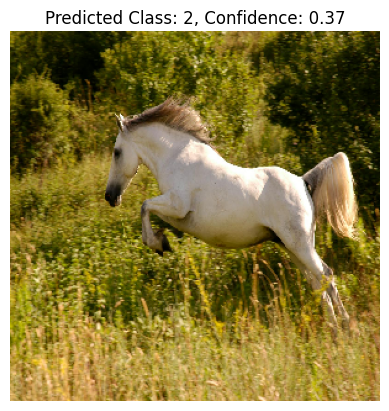

Predicted Class: horse
Confidence: 37.40%


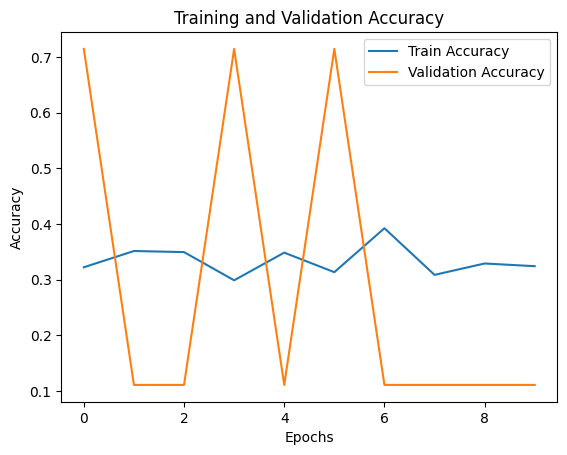

In [48]:
# Get class labels
class_labels = train_data.class_indices
class_labels = {v: k for k, v in class_labels.items()}  # Reverse the dictionary

# Predict on a new image
img_directory = "/kaggle/input/animal/Dataset/test/horse"  # Replace with your image path
img_file = os.listdir(img_directory)[0]  # Take the first image file
img_path = os.path.join(img_directory, img_file)  # Full path to the image file

predicted_class, confidence = predict_image(loaded_model, img_path, (IMG_HEIGHT, IMG_WIDTH))

# Display the prediction
print(f"Predicted Class: {class_labels[predicted_class]}")
print(f"Confidence: {confidence * 100:.2f}%")

# Plot training and validation accuracy
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


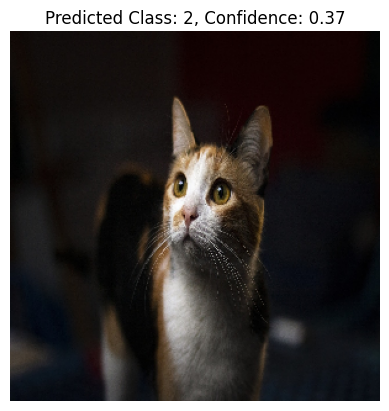

Predicted Class: horse
Confidence: 37.34%


In [49]:
# Get class labels
class_labels = train_data.class_indices
class_labels = {v: k for k, v in class_labels.items()}  # Reverse the dictionary

# Predict on a new image
img_path = "/kaggle/input/animal/Dataset/test/cat/animal-7089224_1280.jpg"  # Full path to the image file

# Make predictions
predicted_class, confidence = predict_image(loaded_model, img_path, (IMG_HEIGHT, IMG_WIDTH))

# Display the prediction
print(f"Predicted Class: {class_labels[predicted_class]}")
print(f"Confidence: {confidence * 100:.2f}%")

### Confusion Matrix and Classification Report

12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 379ms/step - accuracy: 0.9208 - loss: 0.2027
Test Accuracy: 91.34%
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 372ms/step


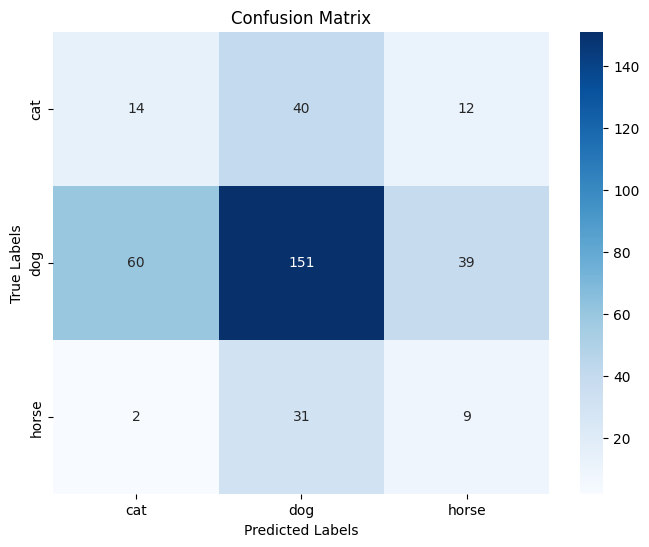

Classification Report:

              precision    recall  f1-score   support

         cat       0.18      0.21      0.20        66
         dog       0.68      0.60      0.64       250
       horse       0.15      0.21      0.18        42

    accuracy                           0.49       358
   macro avg       0.34      0.34      0.34       358
weighted avg       0.53      0.49      0.50       358

              precision    recall  f1-score     support
cat            0.184211  0.212121  0.197183   66.000000
dog            0.680180  0.604000  0.639831  250.000000
horse          0.150000  0.214286  0.176471   42.000000
accuracy       0.486034  0.486034  0.486034    0.486034
macro avg      0.338130  0.343469  0.337828  358.000000
weighted avg   0.526545  0.486034  0.503864  358.000000


In [32]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Get true labels and predictions
test_data.reset()  # Reset the test data generator to start from the beginning
true_labels = test_data.classes  # Ground truth labels
predictions = model.predict(test_data)  # Model predictions
predicted_labels = np.argmax(predictions, axis=1)  # Convert probabilities to class indices

# Generate a confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=list(class_labels.values()), yticklabels=list(class_labels.values()))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Generate a classification report
report = classification_report(true_labels, predicted_labels, target_names=list(class_labels.values()))
print("Classification Report:\n")
print(report)

# Save classification report as a DataFrame
report_df = pd.DataFrame(
    classification_report(true_labels, predicted_labels, target_names=list(class_labels.values()), output_dict=True)
).transpose()

# Display the report as a table
print(report_df)

<div style="
    background: linear-gradient(to right, #f7f8fa, #e6f2ff); 
    color: #333; 
    border-radius: 15px; 
    text-align: center; 
    font-size: 20px; 
    padding: 25px; 
    border: 2px solid #ff4d4d; 
    width: 95%; 
    margin: 30px auto; 
    box-shadow: 0 6px 12px rgba(0, 0, 0, 0.2), 0 0 15px rgba(255, 77, 77, 0.5); 
    transition: all 0.3s ease-in-out;">
    <h1 style="font-size: 28px; margin: 0; font-family: 'Arial', sans-serif;">
        <span style="
            color: #ff3333; 
            font-weight: bold; 
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2);">
            DenseNet121
        </span>
    </h1>
</div>

<style>
    div:hover {
        transform: scale(1.03); /* Slight zoom on hover */
        box-shadow: 0 8px 16px rgba(0, 0, 0, 0.3), 0 0 20px rgba(255, 77, 77, 0.7);
    }
</style>

In [33]:
# Dataset paths
train_dir = "/kaggle/input/animal/Dataset/train"
val_dir = "/kaggle/input/animal/Dataset/val"
test_dir = "/kaggle/input/animal/Dataset/test"

# Image dimensions and batch size
IMG_HEIGHT, IMG_WIDTH = 224, 224  # Default size for DenseNet121
BATCH_SIZE = 32

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
)

val_test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Load training, validation, and test data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="sparse",
)

val_data = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="sparse",
)

test_data = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="sparse",
)

# Load DenseNet121 pre-trained model
base_model = DenseNet121(
    input_tensor=Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),  # Correct input shape
    include_top=False,  # Exclude top layers
    weights="imagenet",  # Use pre-trained weights
)

# Freeze the base model
base_model.trainable = False

# Add custom layers on top of DenseNet121
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Convert feature maps to single vector
x = Dense(128, activation="relu")(x)  # Fully connected layer
x = Dropout(0.3)(x)  # Dropout for regularization
outputs = Dense(3, activation="softmax")(x)  # Final output layer for 3 classes

# Define the final model
model = Model(inputs=base_model.input, outputs=outputs)

# Compile the model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",  # Use sparse loss for integer labels
    metrics=["accuracy"],
)

# Train the model with class weights to handle imbalance
class_weights = {0: 1.0, 1: 1.0, 2: 1.5}  # Increase weight for under-represented class

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor="val_loss", patience=3, factor=0.5, verbose=1)

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    class_weight=class_weights,
    callbacks=[lr_scheduler],
)

# Fine-tune the model by unfreezing some layers
base_model.trainable = True
for layer in base_model.layers[:-20]:  # Freeze all but the last 20 layers
    layer.trainable = False

# Recompile the model for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

Found 1027 images belonging to 3 classes.
Found 378 images belonging to 3 classes.
Found 358 images belonging to 3 classes.
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.5719 - loss: 1.0761 - val_accuracy: 0.9339 - val_loss: 0.1997 - learning_rate: 0.0010
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 27s 659ms/step - accuracy: 0.8821 - loss: 0.3359 - val_accuracy: 0.9497 - val_loss: 0.1557 - learning_rate: 0.0010
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 28s 695ms/step - accuracy: 0.9000 - loss: 0.2837 - val_accuracy: 0.9471 - val_loss: 0.1467 - learning_rate: 0.0010
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 26s 654ms/step - accuracy: 0.9221 - loss: 0.2336 - val_accuracy: 0.9497 - val_loss: 0.1666 - learning_rate: 0.0010
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 26s 632ms/step - accuracy: 0.9068 - loss: 0.2343 - val_accuracy: 0.9762 - val_loss: 0.0873 - learning_rate: 0.0010
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 25s 614ms/step - accuracy

In [34]:
# Fine-tune the model
history_finetune = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5,  # Fine-tuning for fewer epochs
    class_weight=class_weights,
    callbacks=[lr_scheduler],
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.9440 - loss: 0.1680 - val_accuracy: 0.9735 - val_loss: 0.0851 - learning_rate: 1.0000e-04
Epoch 2/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 26s 640ms/step - accuracy: 0.9593 - loss: 0.1541 - val_accuracy: 0.9841 - val_loss: 0.0581 - learning_rate: 1.0000e-04
Epoch 3/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 26s 652ms/step - accuracy: 0.9578 - loss: 0.1394 - val_accuracy: 0.9868 - val_loss: 0.0571 - learning_rate: 1.0000e-04
Epoch 4/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 26s 648ms/step - accuracy: 0.9525 - loss: 0.1500 - val_accuracy: 0.9894 - val_loss: 0.0563 - learning_rate: 1.0000e-04
Epoch 5/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 26s 643ms/step - accuracy: 0.9673 - loss: 0.1094 - val_accuracy: 0.9921 - val_loss: 0.0359 - learning_rate: 1.0000e-04
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9914 - loss: 0.0364 
Test Accuracy: 99.44%


In [35]:
# Save the model
model.save("animal_classification_densenet121.h5")
print("Model saved as 'animal_classification_densenet121.h5'")

# Load the model
loaded_model = tf.keras.models.load_model("animal_classification_densenet121.h5")
print("Model loaded successfully!")
loaded_model.summary()

Model saved as 'animal_classification_densenet121.h5'
Model loaded successfully!


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, 230, 230, 3)    │              0 │ input_layer_4[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,408 │ zero_padding2d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_1          │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 56, 56, 64)     │              0 │ zero_padding2d_1[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 56, 56, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 56, 56, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├──────────────────────

 Total params: 7,169,093 (27.35 MB)

 Trainable params: 498,755 (1.90 MB)

 Non-trainable params: 6,670,336 (25.45 MB)

 Optimizer params: 2 (12.00 B)

In [36]:

# Function to predict an image
def predict_image(model, img_path, target_size):
    """
    Predict the class of an image using a trained model.
    """
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize pixel values

    # Perform prediction
    predictions = model.predict(img_array)
    class_index = np.argmax(predictions, axis=1)[0]
    confidence = np.max(predictions)

    # Display the image
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted Class: {class_index}, Confidence: {confidence:.2f}")
    plt.show()

    return class_index, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


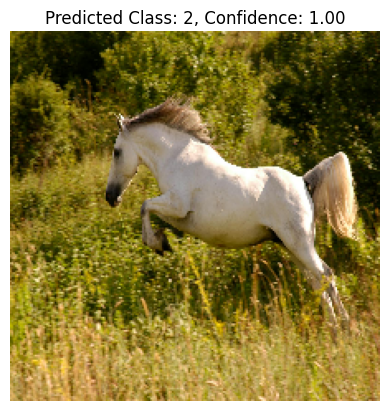

Predicted Class: horse
Confidence: 100.00%


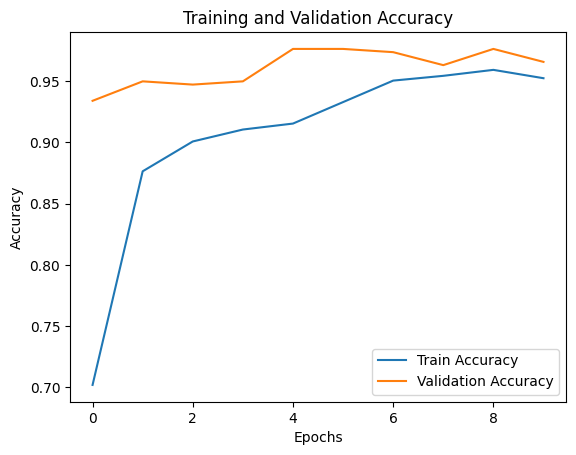

In [37]:
# Get class labels
class_labels = train_data.class_indices
class_labels = {v: k for k, v in class_labels.items()}  # Reverse the dictionary

# Predict on a new image
img_directory = "/kaggle/input/animal/Dataset/test/horse"  # Replace with your image path
img_file = os.listdir(img_directory)[0]  # Take the first image file
img_path = os.path.join(img_directory, img_file)  # Full path to the image file

predicted_class, confidence = predict_image(loaded_model, img_path, (IMG_HEIGHT, IMG_WIDTH))

# Display the prediction
print(f"Predicted Class: {class_labels[predicted_class]}")
print(f"Confidence: {confidence * 100:.2f}%")

# Plot training and validation accuracy
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()

### Confusion Matrix and Classification Report

12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 383ms/step - accuracy: 0.9933 - loss: 0.0478
Test Accuracy: 99.44%
12/12 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step 


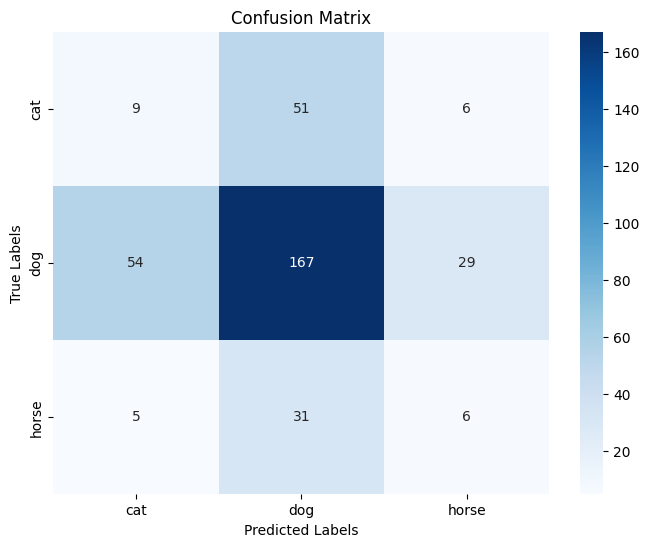

Classification Report:

              precision    recall  f1-score   support

         cat       0.13      0.14      0.13        66
         dog       0.67      0.67      0.67       250
       horse       0.15      0.14      0.14        42

    accuracy                           0.51       358
   macro avg       0.32      0.32      0.32       358
weighted avg       0.51      0.51      0.51       358

              precision    recall  f1-score    support
cat            0.132353  0.136364  0.134328   66.00000
dog            0.670683  0.668000  0.669339  250.00000
horse          0.146341  0.142857  0.144578   42.00000
accuracy       0.508380  0.508380  0.508380    0.50838
macro avg      0.316459  0.315740  0.316082  358.00000
weighted avg   0.509923  0.508380  0.509141  358.00000


In [38]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Get true labels and predictions
test_data.reset()  # Reset the test data generator to start from the beginning
true_labels = test_data.classes  # Ground truth labels
predictions = model.predict(test_data)  # Model predictions
predicted_labels = np.argmax(predictions, axis=1)  # Convert probabilities to class indices

# Generate a confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=list(class_labels.values()), yticklabels=list(class_labels.values()))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Generate a classification report
report = classification_report(true_labels, predicted_labels, target_names=list(class_labels.values()))
print("Classification Report:\n")
print(report)

# Save classification report as a DataFrame
report_df = pd.DataFrame(
    classification_report(true_labels, predicted_labels, target_names=list(class_labels.values()), output_dict=True)
).transpose()

# Display the report as a table
print(report_df)

<div style="
    background: linear-gradient(to right, #f7f8fa, #e6f2ff); 
    color: #333; 
    border-radius: 15px; 
    text-align: center; 
    font-size: 20px; 
    padding: 25px; 
    border: 2px solid #ff4d4d; 
    width: 95%; 
    margin: 30px auto; 
    box-shadow: 0 6px 12px rgba(0, 0, 0, 0.2), 0 0 15px rgba(255, 77, 77, 0.5); 
    transition: all 0.3s ease-in-out;">
    <h1 style="font-size: 28px; margin: 0; font-family: 'Arial', sans-serif;">
        <span style="
            color: #ff3333; 
            font-weight: bold; 
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2);">
            EfficientNetB3
        </span>
    </h1>
</div>

<style>
    div:hover {
        transform: scale(1.03); /* Slight zoom on hover */
        box-shadow: 0 8px 16px rgba(0, 0, 0, 0.3), 0 0 20px rgba(255, 77, 77, 0.7);
    }
</style>

In [39]:
# Dataset paths
train_dir = "/kaggle/input/animal/Dataset/train"
val_dir = "/kaggle/input/animal/Dataset/val"
test_dir = "/kaggle/input/animal/Dataset/test"

# Image dimensions and batch size
IMG_HEIGHT, IMG_WIDTH = 300, 300  # Adjusted for EfficientNetB3's input size
BATCH_SIZE = 32

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
)

val_test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Load training, validation, and test data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="sparse",
)

val_data = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="sparse",
)

test_data = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="sparse",
)

# Load EfficientNetB3 pre-trained model
base_model = EfficientNetB3(
    input_tensor=Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),  # Correct input shape
    include_top=False,  # Exclude top layers
    weights="imagenet",  # Use pre-trained weights
)

# Freeze the base model
base_model.trainable = False

# Add custom layers on top of EfficientNetB3
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Convert feature maps to single vector
x = Dense(128, activation="relu")(x)  # Fully connected layer
x = Dropout(0.3)(x)  # Dropout for regularization
outputs = Dense(3, activation="softmax")(x)  # Final output layer for 3 classes

# Define the final model
model = Model(inputs=base_model.input, outputs=outputs)

# Compile the model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",  # Use sparse loss for integer labels
    metrics=["accuracy"],
)

# Train the model with class weights to handle imbalance
class_weights = {0: 1.0, 1: 1.0, 2: 1.5}  # Increase weight for under-represented class

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor="val_loss", patience=3, factor=0.5, verbose=1)

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    class_weight=class_weights,
    callbacks=[lr_scheduler],
)

# Fine-tune the model by unfreezing some layers
base_model.trainable = True
for layer in base_model.layers[:-20]:  # Freeze all but the last 20 layers
    layer.trainable = False

# Recompile the model for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

# Fine-tune the model
history_finetune = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5,  # Fine-tuning for fewer epochs
    class_weight=class_weights,
    callbacks=[lr_scheduler],
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Found 1027 images belonging to 3 classes.
Found 378 images belonging to 3 classes.
Found 358 images belonging to 3 classes.
43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.2999 - loss: 1.3028 - val_accuracy: 0.7143 - val_loss: 0.9650 - learning_rate: 0.0010
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 35s 873ms/step - accuracy: 0.3502 - loss: 1.2683 - val_accuracy: 0.1111 - val_loss: 1.1591 - learning_rate: 0.0010
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 36s 882ms/step - accuracy: 0.3136 - loss: 1.2478 - val_accuracy: 0.1111 - val_loss: 1.1132 - learning_rate: 0.0010
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 698ms/step - accuracy: 0.2966 - loss: 1.2545
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
33/33 ━━━━━━━━━━━━━━━━━━━━ 36s 871ms/step - accuracy: 0.2967 - loss: 1.2544 - val_accuracy: 0.7143 - val_loss: 1.0456 - learning_rate: 0.0010
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 36s 904ms/step - accuracy: 

In [40]:
# Save the model
model.save("animal_classification_efficientnetb3.h5")
print("Model saved as 'animal_classification_efficientnetb3.h5'")

# Load the model
loaded_model = tf.keras.models.load_model("animal_classification_efficientnetb3.h5")
print("Model loaded successfully!")
loaded_model.summary()

Model saved as 'animal_classification_efficientnetb3.h5'
Model loaded successfully!


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 300, 300, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 300, 300, 3)    │              0 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 300, 300, 3)    │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 300, 300, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 301, 301, 3)    │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 150, 150, 40)   │          1,080 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 150, 150, 40)   │            160 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 150, 150, 40)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 150, 150, 40)   │            360 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 150, 150, 40)   │            160 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 150, 150, 40)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 40)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 40)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 10)       │            410 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 10,980,660 (41.89 MB)

 Trainable params: 3,570,275 (13.62 MB)

 Non-trainable params: 7,410,383 (28.27 MB)

 Optimizer params: 2 (12.00 B)

In [41]:
# Function to predict an image
def predict_image(model, img_path, target_size):
    """
    Predict the class of an image using a trained model.
    """
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize pixel values

    # Perform prediction
    predictions = model.predict(img_array)
    class_index = np.argmax(predictions, axis=1)[0]
    confidence = np.max(predictions)

    # Display the image
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted Class: {class_index}, Confidence: {confidence:.2f}")
    plt.show()

    return class_index, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


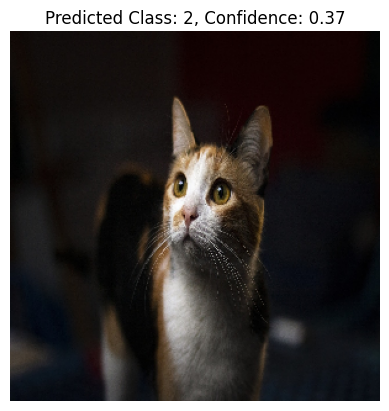

Predicted Class: horse
Confidence: 37.34%


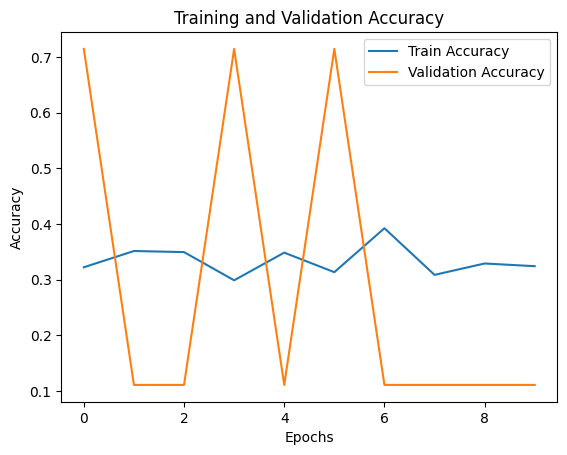

In [44]:
# Get class labels
class_labels = train_data.class_indices
class_labels = {v: k for k, v in class_labels.items()}  # Reverse the dictionary

# Predict on a new image
img_path = "/kaggle/input/animal/Dataset/test/cat/animal-7089224_1280.jpg"  # Full path to the image file

# Make predictions
predicted_class, confidence = predict_image(loaded_model, img_path, (IMG_HEIGHT, IMG_WIDTH))

# Display the prediction
print(f"Predicted Class: {class_labels[predicted_class]}")
print(f"Confidence: {confidence * 100:.2f}%")

# Plot training and validation accuracy
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()

### Confusion Matrix and Classification Report

12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 442ms/step - accuracy: 0.1000 - loss: 1.0795
Test Accuracy: 11.73%
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step 


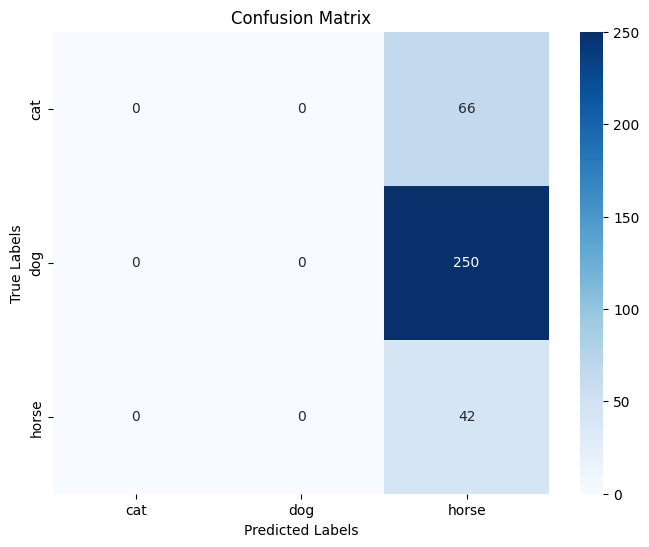

Classification Report:

              precision    recall  f1-score   support

         cat       0.00      0.00      0.00        66
         dog       0.00      0.00      0.00       250
       horse       0.12      1.00      0.21        42

    accuracy                           0.12       358
   macro avg       0.04      0.33      0.07       358
weighted avg       0.01      0.12      0.02       358

              precision    recall  f1-score     support
cat            0.000000  0.000000  0.000000   66.000000
dog            0.000000  0.000000  0.000000  250.000000
horse          0.117318  1.000000  0.210000   42.000000
accuracy       0.117318  0.117318  0.117318    0.117318
macro avg      0.039106  0.333333  0.070000  358.000000
weighted avg   0.013764  0.117318  0.024637  358.000000


In [45]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Get true labels and predictions
test_data.reset()  # Reset the test data generator to start from the beginning
true_labels = test_data.classes  # Ground truth labels
predictions = model.predict(test_data)  # Model predictions
predicted_labels = np.argmax(predictions, axis=1)  # Convert probabilities to class indices

# Generate a confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=list(class_labels.values()), yticklabels=list(class_labels.values()))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Generate a classification report
report = classification_report(true_labels, predicted_labels, target_names=list(class_labels.values()))
print("Classification Report:\n")
print(report)

# Save classification report as a DataFrame
report_df = pd.DataFrame(
    classification_report(true_labels, predicted_labels, target_names=list(class_labels.values()), output_dict=True)
).transpose()

# Display the report as a table
print(report_df)